**TUGAS MBC WEEK 4**

- TOPIK : TRANSFORMER
- NAMA : BENEDICT BRIAN JOEL PURBA
- NIM : 103052300066
- KODE : 2517

# BERT-BASE-UNCASED

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install -q transformers

In [ ]:
# check for the GPU
!nvidia-smi

Fri Aug 29 01:35:09 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   61C    P8             13W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [ ]:
# check the size of the data
print("Train data size \n", train_df.shape )
print()
print("Test data size \n", test_df.shape )

Train data size 
 (5083, 4)

Test data size 
 (1695, 3)


In [ ]:
train_df.head()

,id_comment,source,text,label
0,UID0000,Instagram,makin dewasa makin sadar bahwa taktik pemerint...,SADNESS
1,UID0001,X / Twitter,Membuktikan hal yg benar di pengadilan itu mmg...,ANGER
2,UID0002,Instagram,RIP keadilan di Indonesia 🥀🥀🥀,SADNESS
3,UID0003,Instagram,"Dengan adanya pinjol, judol dan para rentenir ...",ANGER
4,UID0004,Instagram,@revandioctareza negri Morat marit🥀,SADNESS


In [ ]:
train_df.duplicated().sum()

np.int64(0)

<Axes: xlabel='label'>

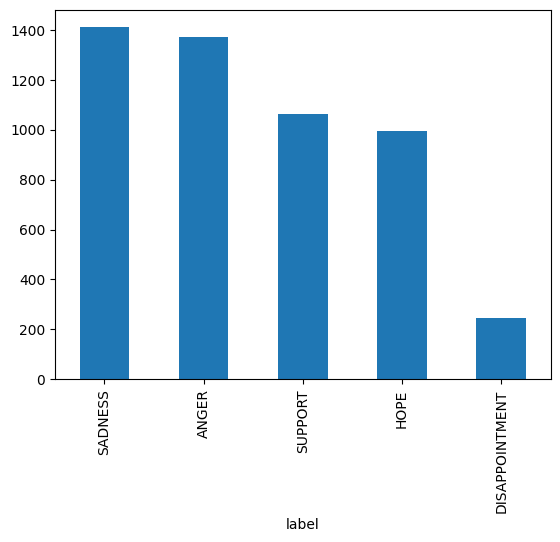

In [ ]:
# checking the target distribution
train_df.label.value_counts().plot(kind = 'bar')

In [ ]:
for i in range(5):
  print(train_df[train_df.label=='SADNESS']['text'].iloc[i])

makin dewasa makin sadar bahwa taktik pemerintah semengerikan itu😢🥀
RIP keadilan di Indonesia 🥀🥀🥀
@revandioctareza negri Morat marit🥀
Udah baek2 di jepang ya bang, gak usah balik lagi kesini, udah gak bisa ditolong lagi ini negara
Negara porak poranda, masih pantaskan kita haha hi hi merayakan kemerdekaan yg mana tdk Ada ruang merdeka bagi kami rakyat Indonesia, kami di jajah secara ekonomi,hukum, social, SDA, semua di jajah oleh pembantu2 rakyat nya sendiri belum lg yg Dari pihak luar yg dg leluasa mendapat ijin akses utk menjajah, miris


In [ ]:
textlen = train_df['text'].apply(lambda x: len(x.split()))

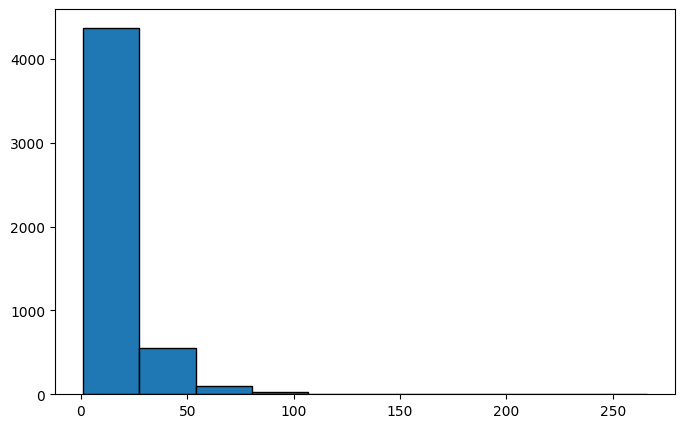

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,5))
plt.hist(textlen, edgecolor = "black");

In [ ]:
SEQ_LEN = 100

In [ ]:
from transformers import BertTokenizer
from transformers import AutoTokenizer
import tensorflow as tf

In [ ]:
from transformers import BertTokenizer

# Ini akan mengunduh semua file ke cache lokal
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

In [ ]:
!ls -R /root/.cache/huggingface/hub/

ls: cannot access '/root/.cache/huggingface/hub/': No such file or directory


In [ ]:
from transformers import BertTokenizer
import os

# Ganti 'path/ke/folder/model' dengan lokasi folder di komputer Anda
local_model_path = "bert-base-uncased"

if os.path.isdir(local_model_path):
    tokenizer = BertTokenizer.from_pretrained(local_model_path, do_lower_case=True)
else:
    print(f"Error: Folder '{local_model_path}' tidak ditemukan.")

In [ ]:
# download the tokenizer
task = "sentiment"
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

In [ ]:
# Preprocess text (username and link placeholders)
def preprocess(text):
    new_text = []

    for t in text.split(" "):
        t = '' if t.startswith('@') and len(t) > 1 else t
        t = '' if t.startswith('http') else t
        t = t.replace("#","")
        new_text.append(t.lower())
    return " ".join(new_text).strip().replace("  ", " ")

In [ ]:
train_df['text'] = train_df['text'].apply(preprocess)
train_df.head()

,id_comment,source,text,label
0,UID0000,Instagram,makin dewasa makin sadar bahwa taktik pemerint...,SADNESS
1,UID0001,X / Twitter,membuktikan hal yg benar di pengadilan itu mmg...,ANGER
2,UID0002,Instagram,rip keadilan di indonesia 🥀🥀🥀,SADNESS
3,UID0003,Instagram,"dengan adanya pinjol, judol dan para rentenir ...",ANGER
4,UID0004,Instagram,negri morat marit🥀,SADNESS


TOKENIZER

In [ ]:
# example of tokenization
tokenized_text = train_df['text'].apply(tokenizer.tokenize)
display(tokenized_text.head())

,text
0,"[ma, ##kin, dew, ##asa, ma, ##kin, sad, ##ar, ..."
1,"[me, ##mb, ##uk, ##ti, ##kan, hal, y, ##g, ben..."
2,"[rip, ke, ##adi, ##lan, di, indonesia, [UNK]]"
3,"[deng, ##an, ada, ##nya, pin, ##jo, ##l, ,, ju..."
4,"[ne, ##gr, ##i, mora, ##t, [UNK]]"


Tanda ## (hash-hash) adalah penanda bahwa unit tersebut adalah lanjutan dari kata sebelumnya.

Jadi, tanda ## bukan untuk mengecilkan huruf, tetapi untuk menunjukkan struktur sub-kata.

In [ ]:
# example of an output from encoded text by tokeneizer
encoded_input = tokenizer(train_df['text'].iloc[0], return_tensors='pt')
print(encoded_input)

{'input_ids': tensor([[  101,  5003,  4939, 24903, 16782,  5003,  4939,  6517,  2906,  8670,
         18663, 27006,  3775,  2243, 21877,  5017, 18447,  4430,  7367,  3549,
          4590,  7556,  2078,   100,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1]])}


- mengubah satu baris teks dari DataFrame menjadi format numerik yang bisa diproses oleh model PyTorch.
- return_tensors='pt': Argumen ini memberi tahu tokenizer untuk mengembalikan hasil dalam format tensor PyTorch ('pt'). Ini sangat penting karena model yang akan memproses input ini (seperti model BERT) menerima input dalam bentuk tensor.

In [ ]:
tokenizer.decode(encoded_input['input_ids'][0])

'[CLS] makin dewasa makin sadar bahwa taktik pemerintah semengerikan [UNK] [SEP]'

 FINALISASI TOKENIZER

 Mengubah seluruh kolom teks dalam DataFrame menjadi format numerik yang siap diproses oleh model TensorFlow

In [ ]:
# encoding the training data
train_encoded_inputs = tokenizer(train_df['text'].tolist(),
                                 add_special_tokens = True,
                                 padding='max_length',
                                 truncation=True,
                                 max_length=SEQ_LEN,
                                 return_token_type_ids=False,
                                 return_tensors = 'tf')

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.


In [ ]:
train_encoded_inputs

{'input_ids': <tf.Tensor: shape=(5083, 100), dtype=int32, numpy=
array([[  101,  5003,  4939, ...,     0,     0,     0],
       [  101,  2033, 14905, ...,     0,     0,     0],
       [  101, 10973, 17710, ...,     0,     0,     0],
       ...,
       [  101,   100, 13970, ...,     0,     0,     0],
       [  101,  7367, 12707, ...,     0,     0,     0],
       [  101, 20934,  4017, ...,     0,     0,     0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(5083, 100), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>}

Membuat Tensorflow Data

In [ ]:
# Map string labels to integers
label_map = {label: i for i, label in enumerate(train_df['label'].unique())}
train_df['label_encoded'] = train_df['label'].map(label_map)

train_dataset = tf.data.Dataset.from_tensor_slices((train_encoded_inputs, train_df['label_encoded'].values))

In [ ]:
# formatting the data as required by bert model
def map_bert(inputs, labels):
  inputs = {'input_ids': inputs['input_ids'],
            'attention_mask': inputs['attention_mask']}

  return inputs, labels

In [ ]:
train_dataset = train_dataset.map(map_bert)

In [ ]:
for t in train_dataset.take(2):
  print (t)

({'input_ids': <tf.Tensor: shape=(100,), dtype=int32, numpy=
array([  101,  5003,  4939, 24903, 16782,  5003,  4939,  6517,  2906,
        8670, 18663, 27006,  3775,  2243, 21877,  5017, 18447,  4430,
        7367,  3549,  4590,  7556,  2078,   100,   102,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(100,), dtype=int32, numpy=
array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
  

Train Test Split

In [ ]:
dataset = train_dataset.shuffle(100000).batch(64)

In [ ]:
# length of the dataset(total batches)
DS_LEN = len(dataset)
DS_LEN

80

In [ ]:
# take 80% for train and 20% for validation
SPLIT = 0.8
train_ds = dataset.take(round(DS_LEN*SPLIT))
val_ds = dataset.skip(round(DS_LEN*SPLIT))

Modelling

In [ ]:
from transformers import TFAutoModel

In [ ]:
bert = TFAutoModel.from_pretrained('bert-base-uncased')

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training

In [ ]:
# create model architecture
n_classes = len(train_df['label'].unique()) # Get the number of unique labels

# Input layers
input_ids = tf.keras.layers.Input(shape=(SEQ_LEN,), dtype=np.int32, name='input_ids' )
mask = tf.keras.layers.Input(shape=(SEQ_LEN,), dtype=np.int32, name = 'attention_mask')

# bert embeddings
embeddings = bert([input_ids, mask])[0]
cls_token = embeddings[:,0,:]

# keras layers
#x = tf.keras.layers.GlobalMaxPool1D()(embeddings)
x = tf.keras.layers.BatchNormalization()(cls_token)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)

# output layer - changed to n_classes units and softmax activation
y = tf.keras.layers.Dense(n_classes, activation='softmax')(x)

# create the model
model = tf.keras.Model(inputs=[input_ids, mask], outputs=y)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 100)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 100)]                0         []                            
 )                                                                                                
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1094822   ['input_ids[0][0]',           
 )                           ngAndCrossAttentions(last_   40         'attention_mask[0][0]']      
                             hidden_state=(None, 100, 7                                       

In [ ]:
# freezing the pretrained bert layer
model.layers[2].trainable = False
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 100)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 100)]                0         []                            
 )                                                                                                
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1094822   ['input_ids[0][0]',           
 )                           ngAndCrossAttentions(last_   40         'attention_mask[0][0]']      
                             hidden_state=(None, 100, 7                                       

COMPILE MODEL

In [ ]:
import transformers

In [ ]:
train_df['label'].unique()

array(['SADNESS', 'ANGER', 'HOPE', 'SUPPORT', 'DISAPPOINTMENT'],
      dtype=object)

In [ ]:
#learning_rate = 1e-3

#optimizer = tf.keras.optimizers.Adam(learning_rate=5e-4)
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=5e-4)
#optimizer = transformers.AdamWeightDecay(learning_rate=5e-4)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

- min_delta pada ReduceLROnPlateau berfungsi sebagai ambang batas untuk menentukan kapan harus mengurangi learning rate.
- min_delta pada EarlyStopping berfungsi sebagai ambang batas untuk menghentikan pelatihan sepenuhnya ketika tidak ada perbaikan yang signifikan.

In [ ]:
# train the model
callbacks = [tf.keras.callbacks.ReduceLROnPlateau(patience=2, factor=0.1,min_delta=0.001,monitor='val_loss'),
             tf.keras.callbacks.EarlyStopping(patience=5, min_delta=0.01, monitor='val_loss')]

# Changed loss to SparseCategoricalCrossentropy for multi-class classification
loss = tf.keras.losses.SparseCategoricalCrossentropy()
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy') # Changed metric

model.compile(optimizer=optimizer, loss=loss, metrics=[metric])


history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 50,
    callbacks = callbacks
)

Epoch 1/50
64/64 [==============================] - 50s 634ms/step - loss: 1.5828 - accuracy: 0.3428 - val_loss: 1.4473 - val_accuracy: 0.3759 - lr: 5.0000e-04
Epoch 2/50
64/64 [==============================] - 40s 630ms/step - loss: 1.4007 - accuracy: 0.4177 - val_loss: 1.3190 - val_accuracy: 0.4934 - lr: 5.0000e-04
Epoch 3/50
64/64 [==============================] - 37s 585ms/step - loss: 1.3452 - accuracy: 0.4363 - val_loss: 1.3052 - val_accuracy: 0.4711 - lr: 5.0000e-04
Epoch 4/50
64/64 [==============================] - 37s 582ms/step - loss: 1.3211 - accuracy: 0.4517 - val_loss: 1.2379 - val_accuracy: 0.5370 - lr: 5.0000e-04
Epoch 5/50
64/64 [==============================] - 37s 579ms/step - loss: 1.2772 - accuracy: 0.4783 - val_loss: 1.1789 - val_accuracy: 0.5400 - lr: 5.0000e-04
Epoch 6/50
64/64 [==============================] - 37s 582ms/step - loss: 1.2707 - accuracy: 0.4875 - val_loss: 1.1795 - val_accuracy: 0.5248 - lr: 5.0000e-04
Epoch 7/50
64/64 [======================

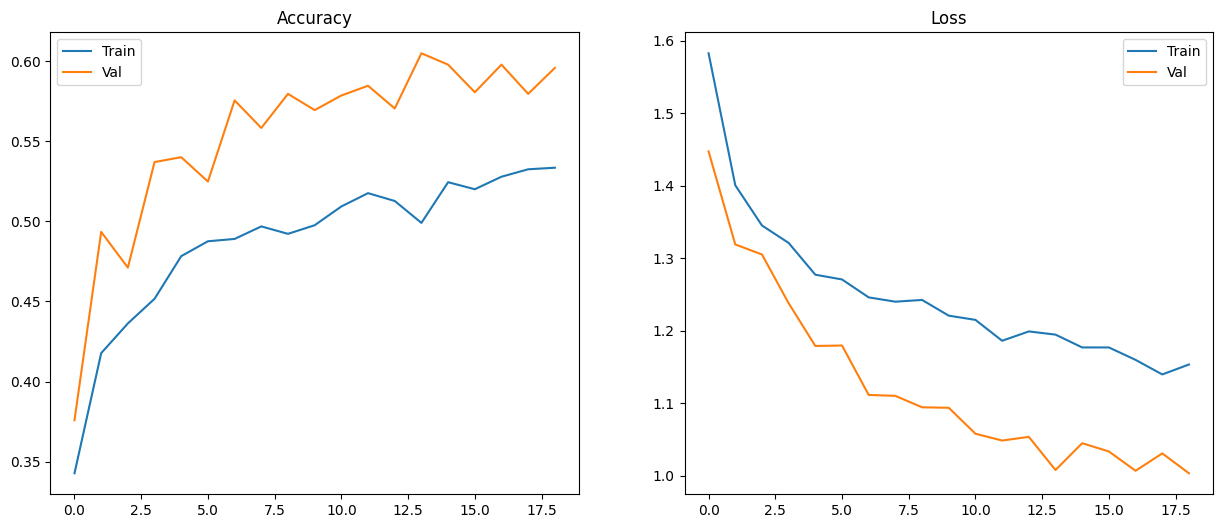

In [ ]:
# plot the performance curve
epochs = history.epoch
plt.figure(figsize=(15, 6))

# Accuracy
plt.subplot(1,2, 1)
plt.plot(epochs, history.history['accuracy'], label="Train")
plt.plot(epochs, history.history['val_accuracy'], label = "Val")
plt.legend()
plt.title("Accuracy")

# loss
plt.subplot(1,2, 2)
plt.plot(epochs, history.history['loss'], label="Train")
plt.plot(epochs, history.history['val_loss'], label = "Val")
plt.legend()
plt.title("Loss")

plt.show()

In [ ]:
# evaluate on val data
model.evaluate(val_ds)

16/16 [==============================] - 7s 457ms/step - loss: 1.0348 - accuracy: 0.5704


[1.0347884893417358, 0.5704153776168823]

In [ ]:
from sklearn.metrics import f1_score
import numpy as np

# Get true labels and predictions for the validation dataset
y_true = []
y_pred = []

for inputs, labels in val_ds:
    # Get predictions from the model
    logits = model.predict(inputs)
    predictions = np.argmax(logits, axis=1)

    # Append true labels and predictions
    y_true.extend(labels.numpy())
    y_pred.extend(predictions)

# Calculate macro F1 score
f1 = f1_score(y_true, y_pred, average='macro')
print("Macro F1 Score:", f1)

1/1 [==============================] - 4s 4s/step
Macro F1 Score: 0.5344453513468898


In [ ]:
from sklearn.metrics import f1_score
import numpy as np

# Get true labels and predictions for the validation dataset
y_true = []
y_pred = []
val_ids = []

# Get the original validation data to extract comment IDs
val_df_original = train_df.iloc[round(DS_LEN*SPLIT) * 64:] # Assuming batch size is 64

for inputs, labels in val_ds:
    # Get predictions from the model
    logits = model.predict(inputs)
    predictions = np.argmax(logits, axis=1)

    # Append true labels and predictions
    y_true.extend(labels.numpy())
    y_pred.extend(predictions)

# Calculate macro F1 score
f1 = f1_score(y_true, y_pred, average='macro')
print("Macro F1 Score:", f1)

# Convert predicted labels back to string labels
reverse_label_map = {i: label for label, i in label_map.items()}
predicted_labels = [reverse_label_map[pred] for pred in y_pred]

# Create a DataFrame for the submission file
submission_df = pd.DataFrame({'id_comment': val_df_original['id_comment'].values[:len(predicted_labels)], 'label': predicted_labels})

# Save the DataFrame to a CSV file
submission_df.to_csv('validation_predictions.csv', index=False)

print("Validation predictions saved to validation_predictions.csv")

1/1 [==============================] - 0s 203ms/step
Macro F1 Score: 0.5083611687017597
Validation predictions saved to validation_predictions.csv


# MULTILINGUAL

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install -q transformers

In [ ]:
train_df2 = pd.read_csv('train.csv')
test_df2 = pd.read_csv('test.csv')

In [ ]:
textlen = train_df2['text'].apply(lambda x: len(x.split()))

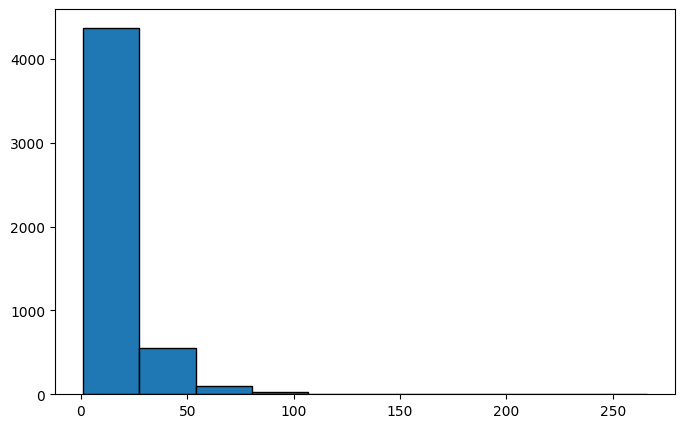

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,5))
plt.hist(textlen, edgecolor = "black");

In [ ]:
SEQ_LEN = 100

In [ ]:
from transformers import BertTokenizer

# Ini akan mengunduh semua file ke cache lokal
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', do_lower_case=True)

In [ ]:
from transformers import BertTokenizer
import os

# Ganti 'path/ke/folder/model' dengan lokasi folder di komputer Anda
local_model_path = "bert-base-multilingual-cased"

if os.path.isdir(local_model_path):
    tokenizer = BertTokenizer.from_pretrained(local_model_path, do_lower_case=True)
else:
    print(f"Error: Folder '{local_model_path}' tidak ditemukan.")

In [ ]:
# download the tokenizer
task = "sentiment"
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', do_lower_case=True)

In [ ]:
# Preprocess text (username and link placeholders)
def preprocess(text):
    new_text = []

    for t in text.split(" "):
        t = '' if t.startswith('@') and len(t) > 1 else t
        t = '' if t.startswith('http') else t
        t = t.replace("#","")
        new_text.append(t.lower())
    return " ".join(new_text).strip().replace("  ", " ")

In [ ]:
train_df2['text'] = train_df2['text'].apply(preprocess)
train_df2.head()

,id_comment,source,text,label
0,UID0000,Instagram,makin dewasa makin sadar bahwa taktik pemerint...,SADNESS
1,UID0001,X / Twitter,membuktikan hal yg benar di pengadilan itu mmg...,ANGER
2,UID0002,Instagram,rip keadilan di indonesia 🥀🥀🥀,SADNESS
3,UID0003,Instagram,"dengan adanya pinjol, judol dan para rentenir ...",ANGER
4,UID0004,Instagram,negri morat marit🥀,SADNESS


In [ ]:
# example of tokenization
tokenized_text = train_df2['text'].apply(tokenizer.tokenize)
display(tokenized_text.head())

,text
0,"[maki, ##n, dewasa, maki, ##n, sada, ##r, bahw..."
1,"[mem, ##buk, ##tikan, hal, yg, benar, di, peng..."
2,"[rip, ke, ##adilan, di, indonesia, [UNK]]"
3,"[dengan, adanya, pin, ##jol, ,, judo, ##l, dan..."
4,"[negri, mora, ##t, [UNK]]"


In [ ]:
# example of an output from encoded text by tokeneizer
encoded_input = tokenizer(train_df2['text'].iloc[0], return_tensors='pt')
print(encoded_input)

{'input_ids': tensor([[  101, 89138, 10115, 27172, 89138, 10115, 34715, 10131, 15170, 68408,
         11017, 28732, 16929, 17879, 20170,   100,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}


In [ ]:
tokenizer.decode(encoded_input['input_ids'][0])

'[CLS] makin dewasa makin sadar bahwa taktik pemerintah semengerikan [UNK] [SEP]'

In [ ]:
# encoding the training data
train_encoded_inputs = tokenizer(train_df2['text'].tolist(),
                                 add_special_tokens = True,
                                 padding='max_length',
                                 truncation=True,
                                 max_length=SEQ_LEN,
                                 return_token_type_ids=False,
                                 return_tensors = 'tf')

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.


In [ ]:
train_encoded_inputs

{'input_ids': <tf.Tensor: shape=(5083, 100), dtype=int32, numpy=
array([[  101, 89138, 10115, ...,     0,     0,     0],
       [  101, 26222, 59015, ...,     0,     0,     0],
       [  101, 78078, 11009, ...,     0,     0,     0],
       ...,
       [  101,   100, 49726, ...,     0,     0,     0],
       [  101, 10128, 20452, ...,     0,     0,     0],
       [  101, 65460, 10123, ...,     0,     0,     0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(5083, 100), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>}

In [ ]:
# Map string labels to integers
import tensorflow as tf
label_map = {label: i for i, label in enumerate(train_df2['label'].unique())}
train_df2['label_encoded'] = train_df2['label'].map(label_map)

train_dataset = tf.data.Dataset.from_tensor_slices((train_encoded_inputs, train_df2['label_encoded'].values))

In [ ]:
# formatting the data as required by bert model
def map_bert(inputs, labels):
  inputs = {'input_ids': inputs['input_ids'],
            'attention_mask': inputs['attention_mask']}

  return inputs, labels

In [ ]:
train_dataset = train_dataset.map(map_bert)

In [ ]:
for t in train_dataset.take(2):
  print (t)

({'input_ids': <tf.Tensor: shape=(100,), dtype=int32, numpy=
array([  101, 89138, 10115, 27172, 89138, 10115, 34715, 10131, 15170,
       68408, 11017, 28732, 16929, 17879, 20170,   100,   102,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(100,), dtype=int32, numpy=
array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
  

In [ ]:
dataset = train_dataset.shuffle(100000).batch(64)

In [ ]:
# length of the dataset(total batches)
DS_LEN = len(dataset)
DS_LEN

80

In [ ]:
# take 80% for train and 20% for validation
SPLIT = 0.8
train_ds = dataset.take(round(DS_LEN*SPLIT))
val_ds = dataset.skip(round(DS_LEN*SPLIT))

In [ ]:
from transformers import TFAutoModel

In [ ]:
bert_multilingual = TFAutoModel.from_pretrained('bert-base-multilingual-cased')

Some layers from the model checkpoint at bert-base-multilingual-cased were not used when initializing TFBertModel: ['dropout_37', 'classifier']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-multilingual-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
# create model architecture
n_classes = len(train_df2['label'].unique()) # Get the number of unique labels

# Input layers
input_ids = tf.keras.layers.Input(shape=(SEQ_LEN,), dtype=np.int32, name='input_ids' )
mask = tf.keras.layers.Input(shape=(SEQ_LEN,), dtype=np.int32, name = 'attention_mask')

# bert embeddings
embeddings = bert_multilingual(input_ids=input_ids, attention_mask=mask)[0]
cls_token = embeddings[:,0,:]

# keras layers
#x = tf.keras.layers.GlobalMaxPool1D()(embeddings)
x = tf.keras.layers.BatchNormalization()(cls_token)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)

# output layer - changed to n_classes units and softmax activation
y = tf.keras.layers.Dense(n_classes, activation='softmax')(x)

# create the model
model = tf.keras.Model(inputs=[input_ids, mask], outputs=y)

ValueError: Exception encountered when calling layer 'tf_bert_model_3' (type TFBertModel).

Data of type <class 'keras.src.backend.common.keras_tensor.KerasTensor'> is not allowed only (<class 'tensorflow.python.framework.tensor.Tensor'>, <class 'bool'>, <class 'int'>, <class 'transformers.utils.generic.ModelOutput'>, <class 'tuple'>, <class 'list'>, <class 'dict'>, <class 'numpy.ndarray'>) is accepted for input_ids.

Call arguments received by layer 'tf_bert_model_3' (type TFBertModel):
  • input_ids={'input_ids': '<KerasTensor shape=(None, 100), dtype=int32, sparse=False, ragged=False, name=input_ids>', 'attention_mask': '<KerasTensor shape=(None, 100), dtype=int32, sparse=False, ragged=False, name=attention_mask>'}
  • attention_mask=None
  • token_type_ids=None
  • position_ids=None
  • head_mask=None
  • inputs_embeds=None
  • encoder_hidden_states=None
  • encoder_attention_mask=None
  • past_key_values=None
  • use_cache=None
  • output_attentions=None
  • output_hidden_states=None
  • return_dict=None
  • training=False

#EKSPERIMEN 3

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.model_selection import train_test_split

In [10]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [11]:
def preprocess(text):
    new_text = []
    for t in str(text).split(" "):
        t = '' if t.startswith('@') and len(t) > 1 else t
        t = '' if t.startswith('http') else t
        t = t.replace("#","")
        new_text.append(t.lower())
    return " ".join(new_text).strip().replace("  ", " ")

In [12]:
train_df['text'] = train_df['text'].apply(preprocess)
test_df['text'] = test_df['text'].apply(preprocess)

In [13]:
label_order = ['SADNESS', 'ANGER', 'SUPPORT', 'HOPE', 'DISAPPOINTMENT']
label_map = {label: i for i, label in enumerate(label_order)}
id_to_label = {i: label for label, i in label_map.items()}

In [14]:
train_df['label_encoded'] = train_df['label'].map(label_map)

In [15]:
SEQ_LEN = 105

In [16]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

In [17]:
train_encoded_inputs = tokenizer(train_df['text'].tolist(),
                                 add_special_tokens = True,
                                 padding='max_length',
                                 truncation=True,
                                 max_length=SEQ_LEN,
                                 return_token_type_ids=False,
                                 return_tensors = 'tf')

In [18]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_encoded_inputs, train_df['label_encoded'].values))

In [19]:
def map_bert(inputs, labels):
  inputs = {'input_ids': inputs['input_ids'],
            'attention_mask': inputs['attention_mask']}
  return inputs, labels

train_dataset = train_dataset.map(map_bert)

In [20]:
DS_LEN = len(train_dataset)
SPLIT = 0.8
train_ds = train_dataset.take(round(DS_LEN * SPLIT)).batch(64)
val_ds = train_dataset.skip(round(DS_LEN * SPLIT)).batch(64)

In [22]:
n_classes = len(label_order) # Use the defined order for number of classes
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=n_classes)

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [23]:
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5) # Using Adam optimizer
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

In [24]:
print("Starting model training...")
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')] # Added early stopping
)
print("Training finished.")

Starting model training...
Epoch 1/20
64/64 [==============================] - 148s 1s/step - loss: 1.3902 - accuracy: 0.4073 - val_loss: 1.1984 - val_accuracy: 0.5388
Epoch 2/20
64/64 [==============================] - 87s 1s/step - loss: 1.0873 - accuracy: 0.5853 - val_loss: 1.0476 - val_accuracy: 0.6037
Epoch 3/20
64/64 [==============================] - 88s 1s/step - loss: 0.8733 - accuracy: 0.6731 - val_loss: 1.0778 - val_accuracy: 0.6254
Epoch 4/20
64/64 [==============================] - 88s 1s/step - loss: 0.7113 - accuracy: 0.7526 - val_loss: 1.0665 - val_accuracy: 0.6411
Epoch 5/20
64/64 [==============================] - 88s 1s/step - loss: 0.5765 - accuracy: 0.8013 - val_loss: 1.1202 - val_accuracy: 0.6411
Training finished.


In [25]:
from sklearn.metrics import f1_score
import numpy as np

# Get true labels and predictions for the validation dataset
y_true = []
y_pred = []

for inputs, labels in val_ds:
    # Get predictions from the model
    logits = model.predict(inputs)
    predictions = np.argmax(logits.logits, axis=1) # Access logits attribute

    # Append true labels and predictions
    y_true.extend(labels.numpy())
    y_pred.extend(predictions)

# Calculate macro F1 score
f1 = f1_score(y_true, y_pred, average='macro')
print("Macro F1 Score on Validation Data:", f1)

2/2 [==============================] - 4s 190ms/step
Macro F1 Score on Validation Data: 0.543146058246647


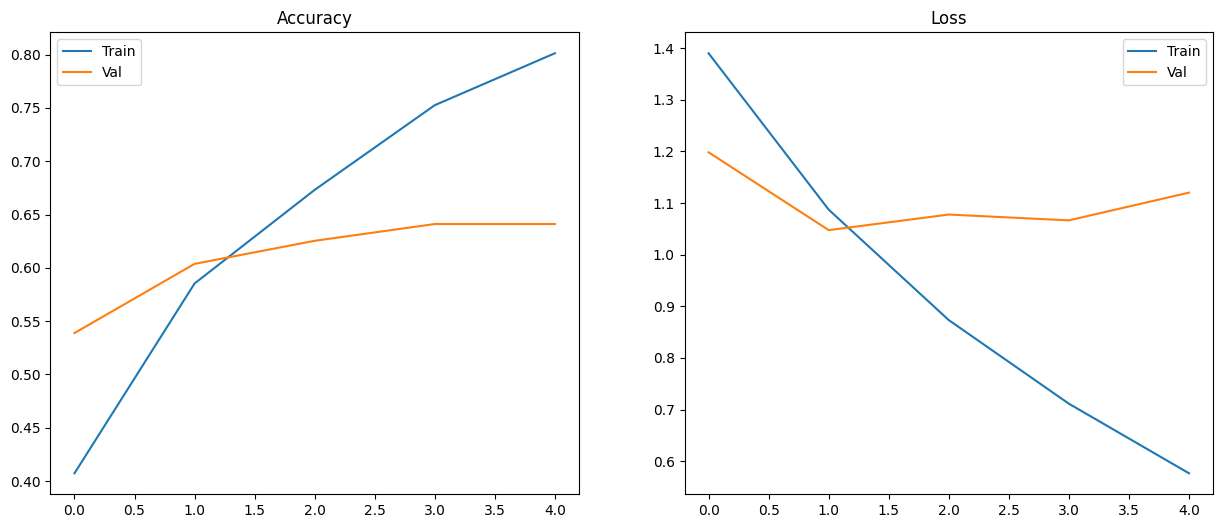

In [28]:
import matplotlib.pyplot as plt
# plot the performance curve
epochs = history.epoch
plt.figure(figsize=(15, 6))

# Accuracy
plt.subplot(1,2, 1)
plt.plot(epochs, history.history['accuracy'], label="Train")
plt.plot(epochs, history.history['val_accuracy'], label = "Val")
plt.legend()
plt.title("Accuracy")

# loss
plt.subplot(1,2, 2)
plt.plot(epochs, history.history['loss'], label="Train")
plt.plot(epochs, history.history['val_loss'], label = "Val")
plt.legend()
plt.title("Loss")

plt.show()

In [29]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_true, y_pred, target_names=label_order)
print("Classification Report on Validation Data:")
print(report)

Classification Report on Validation Data:
                precision    recall  f1-score   support

       SADNESS       0.54      0.68      0.61       259
         ANGER       0.67      0.68      0.68       266
       SUPPORT       0.78      0.64      0.70       226
          HOPE       0.64      0.68      0.66       214
DISAPPOINTMENT       0.50      0.04      0.07        52

      accuracy                           0.64      1017
     macro avg       0.63      0.55      0.54      1017
  weighted avg       0.65      0.64      0.63      1017



In [30]:
# check the distribution of labels in the training data
print("Label distribution in training data:")
print(train_df['label'].value_counts())

Label distribution in training data:
label
SADNESS           1410
ANGER             1370
SUPPORT           1062
HOPE               994
DISAPPOINTMENT     247
Name: count, dtype: int64


- Model mempelajari dan prediksi setiap label cukup bagus dimana diatas 0.50 kecuali untuk label DISAPPOINTMENT dimana sedikit nya data yang terkategori DISAPPOINTMENT.

# KESIMPULAN

- TFBertForSequenceClassification model yang sudah memiliki lapisan klasifikasi di atasnya.
- ForSequenceClassification : model ini secara spesifik disesuaikan untuk tugas klasifikasi sekuens (seperti teks atau kalimat).
- TFAutoModel.from_pretrained() masih membutuhkan arsitektur manual karena tanpa lapisan klasifikasi.

PERCOBAAN UNTUK MERATAKAN WEIGHT TIAP LABEL

In [31]:
from sklearn.utils import class_weight
import numpy as np

# Calculate class weights
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(train_df['label_encoded']),
    y=train_df['label_encoded']
)

# Convert class weights to a dictionary
class_weights_dict = dict(enumerate(class_weights))

print("Class weights:", class_weights_dict)

# Recompile the model with class weights
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5) # Using Adam optimizer
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

# Train the model with class weights
print("Starting model training with class weights...")
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')],
    class_weight=class_weights_dict # Add class weights here
)
print("Training finished.")

Class weights: {0: np.float64(0.7209929078014184), 1: np.float64(0.742043795620438), 2: np.float64(0.9572504708097929), 3: np.float64(1.0227364185110663), 4: np.float64(4.11578947368421)}
Starting model training with class weights...
Epoch 1/20
64/64 [==============================] - 140s 1s/step - loss: 0.5900 - accuracy: 0.7978 - val_loss: 1.3171 - val_accuracy: 0.5506
Epoch 2/20
64/64 [==============================] - 88s 1s/step - loss: 0.4311 - accuracy: 0.8468 - val_loss: 1.3998 - val_accuracy: 0.5683
Epoch 3/20
64/64 [==============================] - 88s 1s/step - loss: 0.2839 - accuracy: 0.8982 - val_loss: 1.5887 - val_accuracy: 0.5595
Epoch 4/20
64/64 [==============================] - 88s 1s/step - loss: 0.2444 - accuracy: 0.9070 - val_loss: 1.5465 - val_accuracy: 0.5801
Training finished.


In [32]:
from sklearn.metrics import f1_score
import numpy as np

# Get true labels and predictions for the validation dataset
y_true = []
y_pred = []

for inputs, labels in val_ds:
    # Get predictions from the model
    logits = model.predict(inputs)
    predictions = np.argmax(logits.logits, axis=1) # Access logits attribute

    # Append true labels and predictions
    y_true.extend(labels.numpy())
    y_pred.extend(predictions)

# Calculate macro F1 score
f1 = f1_score(y_true, y_pred, average='macro')
print("Macro F1 Score on Validation Data (with class weights):", f1)

2/2 [==============================] - 4s 195ms/step
Macro F1 Score on Validation Data (with class weights): 0.5241364600868146
